  Using cached rdkit_pypi-2022.9.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (29.4 MB)
Mounted at /content/drive
Điểm Tanimoto trung bình giữa hai tệp là: 0.1663609116448626


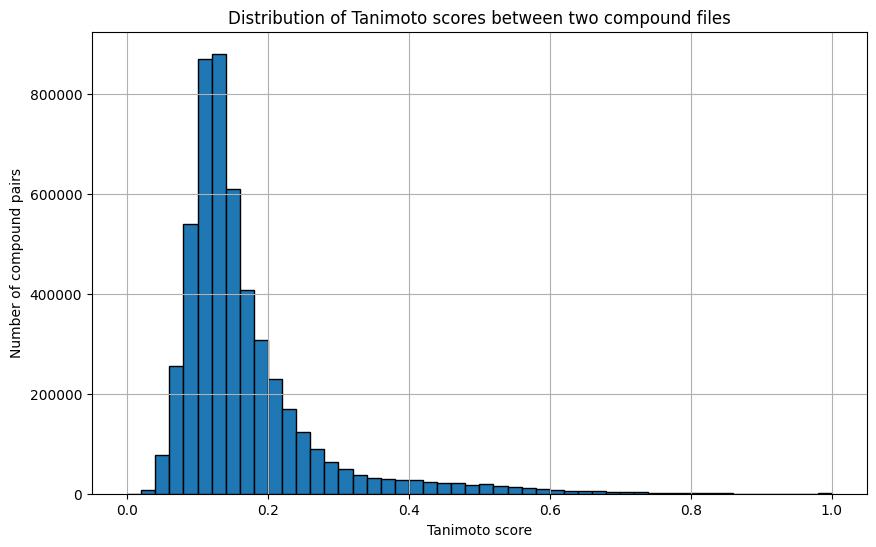

In [1]:
!pip install rdkit-pypi matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import TanimotoSimilarity

from google.colab import drive
drive.mount('/content/drive')

# Đọc dữ liệu từ các tệp CSV
chembl_df = pd.read_csv('/content/drive/My Drive/3.Thesis 2/Weekly tasks/Teachopen CADD/Training_bioactivities_data.csv')
pubchem_df = pd.read_csv('/content/drive/My Drive/3.Thesis 2/Weekly tasks/Teachopen CADD/Get compound/Pubchem/filtered.csv')

# Chuyển đổi các chuỗi SMILES thành các đối tượng phân tử sử dụng RDKit
chembl_df['Mol'] = chembl_df['smiles'].apply(Chem.MolFromSmiles)
pubchem_df['Mol'] = pubchem_df['PUBCHEM_EXT_DATASOURCE_SMILES'].apply(Chem.MolFromSmiles)

# Bỏ qua các phân tử không hợp lệ
chembl_df = chembl_df[chembl_df['Mol'].notnull()]
pubchem_df = pubchem_df[pubchem_df['Mol'].notnull()]

# Tính toán dấu vân tay Morgan cho các phân tử
chembl_df['Fingerprint'] = chembl_df['Mol'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, radius=2, nBits=2048))
pubchem_df['Fingerprint'] = pubchem_df['Mol'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, radius=2, nBits=2048))

# Tính toán điểm Tanimoto giữa các dấu vân tay của hai tệp
tanimoto_scores = []

for chembl_fp in chembl_df['Fingerprint']:
    for pubchem_fp in pubchem_df['Fingerprint']:
        score = TanimotoSimilarity(chembl_fp, pubchem_fp)
        tanimoto_scores.append(score)

# Tính toán điểm Tanimoto trung bình
average_tanimoto_score = sum(tanimoto_scores) / len(tanimoto_scores)
print(f"Điểm Tanimoto trung bình giữa hai tệp là: {average_tanimoto_score}")

# Vẽ histogram để biểu diễn phân phối điểm Tanimoto
plt.figure(figsize=(10, 6))
plt.hist(tanimoto_scores, bins=50, edgecolor='black')
plt.title('Distribution of Tanimoto scores between two compound files')
plt.xlabel('Tanimoto score')
plt.ylabel('Number of compound pairs')
plt.grid(True)
plt.show()
